<IMG SRC="http://www.lirmm.fr/~poncelet/EGC2021/smallbandeau_EGC2021.png" align="center" >

<H1> Utilisation d'un modèle </H1>


Lors de l'étape précédente, nous avons créé un modèle. L'objectif ici est d'utiliser ce modèle sur de nouvelles données. Dans un premier temps, nous allons tricher un peu en reprenant le même jeu de données. Dans un second temps nous utilisons un autre jeu de données et évaluons la qualité du modèle appris. 

## **Installation**




Avant de commencer, il est nécessaire de déjà posséder dans son environnement toutes les librairies utiles. Dans la seconde cellule nous importons toutes les librairies qui seront utiles à ce notebook. Il se peut que, lorsque vous lanciez l'éxecution de cette cellule, une soit absente. Dans ce cas il est nécessaire de l'installer. Pour cela dans la cellule suivante utiliser la commande :  

*! pip install nom_librairie*  

**Attention :** il est fortement conseillé lorsque l'une des librairies doit être installer de relancer le kernel de votre notebook.

**Remarque :** même si toutes les librairies sont importées dès le début, les librairies utiles pour des fonctions présentées au cours de ce notebook sont ré-importées de manière à indiquer d'où elles viennent et ainsi faciliter la réutilisation de la fonction dans un autre projet.
 

In [ ]:
# utiliser cette cellule pour installer les librairies manquantes
# pour cela il suffit de taper dans cette cellule : !pip install nom_librairie_manquante
# d'exécuter la cellule et de relancer la cellule suivante pour voir si tout se passe bien
# recommencer tant que toutes les librairies ne sont pas installées ...


#!pip install ..

# ne pas oublier de relancer le kernel du notebook

In [ ]:
# Importation des différentes librairies utiles pour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# librairies générales
import pickle # pour charger le modèle
import pandas as pd
import string
from random import randint
import re
from tabulate import tabulate
import time
import numpy as np
import base64

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns


# librairies scikit learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

# librairies associées à NLTK
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

stop_words = set(stopwords.words('english')) 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Pour pouvoir lire et sauvegarder sur votre répertoire Google Drive, il est nécessaire de fournir une autorisation. Pour cela il suffit d'éxecuter la ligne suivante et de saisir le code donné par Google.

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


Corriger éventuellement la ligne ci-dessous pour mettre le chemin vers un répertoire spécifique dans votre répertoire google drive : 

In [ ]:
%cd /content/gdrive/My Drive/Colab Notebooks/EGC_Ecole2021
#
# pour une utilisation sur une machine locale changer le chemin ci-dessous et décommenter la ligne
#%cd ./

/content/gdrive/My Drive/Colab Notebooks/EGC_Ecole2021


In [1]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *
import SolUtiliserUnModele 

ModuleNotFoundError: ignored

## **Chargement et utilisation d'un modèle**

   

Dans le notebook de classification de textes, nous avons crée un modèle et nous l'avons sauvegardé en utilisant pickle. L'objectif, à présent, est de montrer comment ce modèle appris peut être utilisé sur de nouvelles données.

Dans un premier temps il faut charger le modèle. Nous considérons que le modèle est sauvegardé sur le répertoire indiqué par la variable path préalablement initialisée.

In [ ]:
import pickle

print ("Chargement du modèle \n")

filename = 'SentimentModel.pkl'


# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))

# affichage du modèle sauvegardé
print (clf_loaded)


Chargement du modèle 



AttributeError: ignored

<font color=red>Exercice :</font> le code précédent ne fonctionne pas et annonce une erreur : "Can't get attribute 'TextNormalizer' on <module '__main__'>", pourquoi ? que proposez vous ? 

<font color=blue>Solution :</font>  

In [ ]:
# actuellement le modèle utilise une classe (*TextNormalizer*) ainsi qu'une fonction
# (*MyCleanText*) que vous avez créé pour faire les pré-traitements. 
# Pickle, lorsqu'il sauvegarde le modèle ne sauvegarde que l'appel à la fonction 
# sans le corps de cette dernière (C.f. notebook "1 - Classification de donnees). 
# En d'autres termes, il ne connait pas le contenu de la classe ni de la fonction 
# et ne peut donc pas les exécuter.  

# Pour permettre que le modèle puisse avoir accés à ce contenu, 
# il est nécessaire de créér un fichier contenant la classe et la fonction. 

# Attention : TextNormalizer et MyCleanText utilisent également des librairies et 
# ces dernières doivent etre importeés dans le fichier. 

# L'importation se fait en précisant le nom de la classe et de la fonction que l'on souhaite recupérer :

from CleanText import TextNormalizer, MyCleanText

# ou par from CleanText import *


# exemple d'utilisation pour montrer que la classe a bien été importée
texte = "This is an example of using the Function MyCleanText before creating a vector created, this text has some problems like 1 c or even numbers like 13 and we have corpora"

print (" Texte d'origine :", texte,'  ')
print ('Utilisationde MyClean Text avec les parametres par défaut (suppression des stopwords, racinisation, minuscule, etc) :')
print (MyCleanText(texte),'  ')

print ('Utilisationde MyClean Text avec convertion en minuscule, en prenant les racines, en supprimant les nombres :')
print (MyCleanText(texte,lowercase=True,getstemmer=True, removedigit=True),'  ')

print ('Utilisationde MyClean Text avec convertion en minuscule et en mettant sous la forme de lemmes :')
print (MyCleanText(texte,lowercase=True,getlemmatisation=True),' ')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
 Texte d'origine : This is an example of using the Function MyCleanText before creating a vector created, this text has some problems like 1 c or even numbers like 13 and we have corpora   
Utilisationde MyClean Text avec les parametres par défaut (suppression des stopwords, racinisation, minuscule, etc) :
This is an example of using the Function MyCleanText before creating vector created this text has some problems like 1 or even numbers like 13 and we have corpora   
Utilisationde MyClean Text avec convertion en minuscule, en prenant les racines, en supprimant les nombres :
thi is an exampl of use the function mycleantext befor creat vector crea

Nous pouvons, à présent, charger le modèle : 

In [ ]:
filename = 'SentimentModel.pkl'

# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))

# affichage du modèle sauvegardé
print (clf_loaded)

Pipeline(memory=None,
         steps=[('cleaner',
                 TextNormalizer(getlemmatisation=False, getstemmer=False,
                                lowercase=False, removedigit=False,
                                removestopwords=False)),
                ('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase='True', max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram...
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),


## **Test sur le jeu de données initial**



Pour faire un premier test, nous allons tricher un peu ! Nous allons utiliser un échantillon des données issues du jeu de données sur lequel nous avons appris ...

In [ ]:
!wget https://www.lirmm.fr/~poncelet/EGC2021/ReviewsLabelled.csv

(3000, 3)
Sélection aléatoire de  700  documents 

Prédiction sur  700  données tirées au hasard 

Accuracy : 0.993
Classification Report
              precision    recall  f1-score   support

           0    0.98645   1.00000   0.99318       364
           1    1.00000   0.98512   0.99250       336

    accuracy                        0.99286       700
   macro avg    0.99322   0.99256   0.99284       700
weighted avg    0.99295   0.99286   0.99285       700



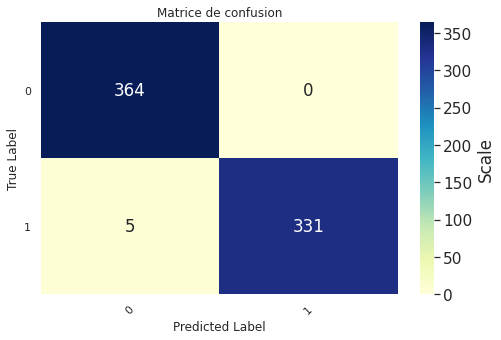

In [ ]:
df_donnees = pd.read_csv("ReviewsLabelled.csv", names=['sentence','sentiment','source'], 
                 header=0,sep='\t', encoding='utf8')

print (df_donnees.shape)

# sélection d'un échantillon 
nb_samples=700
print ("Sélection aléatoire de ",nb_samples," documents \n")

samples=[]
samples_result=[]
sample_new=[]
for i in range(0,nb_samples):
    val=randint(1,df_donnees.shape[0]-1)
    sample_new.append(val)
    samples.append(df_donnees.sentence[val])
    samples_result.append(df_donnees.sentiment[val])
    
print ("Prédiction sur ",nb_samples," données tirées au hasard \n") 

y_test=samples_result 

y_pred = clf_loaded.predict(samples)

# autres mesures et matrice de confusion
MyshowAllScores(y_test,y_pred)


Comme nous pouvons le constater, le modèle appliqué .... sur les données sur lesquelles nous avons appris ... donne heureusement de très bons résultats. Aussi, pour réellement analyser la qualité de notre modèle nous  allons utiliser un autre jeu de données de sentiment.

## **Test sur un autre jeu de données**




Dans ce test nous utilisons un autre jeu de données issus d'avis sur des films (issu également d'imdb). L'objectif est de voir si le modèle que nous avons appris en considérant des avis sur amazon, sur yelp et sur imbd et assez performant.
Le fichier peut être récupéré à l'adresse suivante : 

In [ ]:
!wget https://www.lirmm.fr/~poncelet/EGC2021/movie_data.csv

Les cinq premières lignes 

                                              review  sentiment
0  I went and saw this movie last night after bei...          1
1  Actor turned director Bill Paxton follows up h...          1
2  As a recreational golfer with some knowledge o...          1
3  I saw this film in a sneak preview, and it is ...          1
4  Bill Paxton has taken the true story of the 19...          1

Un exemple de review : 
 I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the se

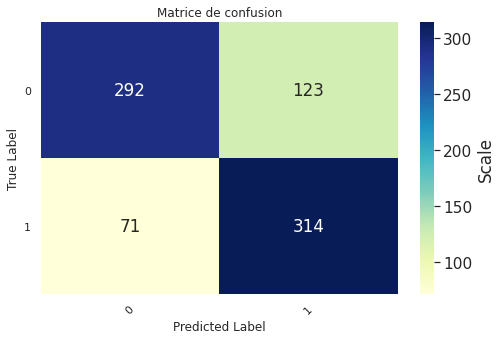

In [ ]:
df_autresdonnees = pd.read_csv("movie_data.csv", names=['review','sentiment'], 
                 header=0,sep=',', encoding='utf8')
print ("Les cinq premières lignes \n")
print (df_autresdonnees.head())
print ("\nUn exemple de review : \n",df_autresdonnees.review[0])

# selection d'un echantillon
nbsamples=800
df_sample=df_autresdonnees.sample(n = nbsamples) 

print ("\nPrédiction sur ",nbsamples," données tirées au hasard \n")       
y_test=df_sample.sentiment 
X=df_sample.review
y_pred = clf_loaded.predict(X)

# autres mesures et matrice de confusion
MyshowAllScores(y_test,y_pred)

Nous constatons que le modèle est nettement moins performant.

Dans la suite, nous apprenons un nouveau modèle à partir de ce nouveau jeu de données. Par soucis de simplification (... de nombreuses expérimentations avec gridsearch ont été réalisées ...), et étant donné que l'apprentissage du modèle avec les paramètres et hyperparamètres suivants 

*pipelinefinal=Pipeline([("cleaner", TextNormalizer(getlemmatisation= 'True',removedigit= 'True', removestopwords= 'True')),  
                   ("tfidf", TfidfVectorizer(lowercase='True')),  
                   ('svm', SVC(C=1, gamma=1,kernel='rbf'))])*  
                   
est très long, nous fournissons le modèle appris.    

Ce modèle a été créé à partir de 90% du jeu de données de manière à conserver 10% (les données ont été triées avant de les répartir) qui pourront être utilisés comme jeu de test (contrairement à la première expérimentation où le test a été effectué sur le jeu de données sur lequel nous avions appris ...)

Vous pouvez récupérer le nouveau modèle ainsi que le jeu de données pour effectuer la prédiction ici :


In [ ]:
!wget https://www.lirmm.fr/~poncelet/EGC2021/NewSentimentModel.pkl
!wget https://www.lirmm.fr/~poncelet/EGC2021/movie_data_to_test.csv

<font color=red>Exercice :</font> charger le nouveau modèle *NewSentimentModel.pkl* et évaluer le sur les données de *movie_data_to_test.csv*. Que pensez vous des performances de ce nouveau modèle ?

<font color=blue>Solution :</font> 


le modèle sauvegardé :  Pipeline(memory=None,
         steps=[('cleaner',
                 TextNormalizer(getlemmatisation='True', getstemmer=False,
                                lowercase=False, removedigit='True',
                                removestopwords='True')),
                ('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase='True', max_df=1.0,
                                 max_features=None, min_df=1,
                                 ng...
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                            

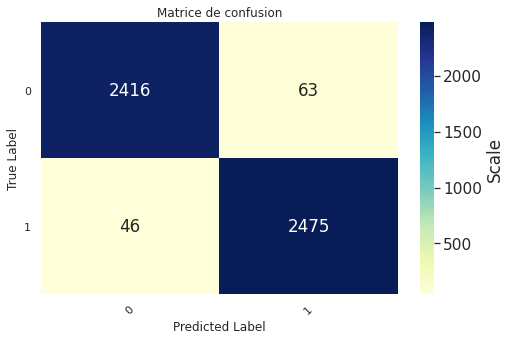

In [ ]:
# il suffit de charger le modele et de l'appliquer avec predict. 
# Comme nous pouvons le constater les resultats sont maintenant de 0.90 d'accuracy 
# contrairement aux 0.77 du premier modele. Même s'il s'agit d'avis exprimes, 
# nous constatons  que meme si l'on a appris un modele sur un jeu de donnees d'avis ... 
# cela ne veut pas dire qu'il sera efficace sur d'autres jeux de donnees d'avis... 
# ici le premier modele contient egalement des avis tres différents (sur des objets, sur des lieux, ...) 
# et le vocabulaire utilise n'est forcement pas le meme que pour des opinions exprimees uniquement sur des films. 

# le chargement se fait via la fonction load
nouveaumodel = pickle.load(open('NewSentimentModel.pkl', 'rb'))

# affichage du modele sauvegarde
print ("le modèle sauvegardé : ",nouveaumodel,' ')

# chargement des donnees a tester 
df_atester=pd.read_csv('movie_data_to_test.csv', names=['review','sentiment'], 
                 header=0,sep=',', encoding='utf8')
print ("prédictions sur le jeu de données movie_data_to_test qui contient ",df_atester.shape[0],' avis')
X_test=df_atester.review
y_test=df_atester.sentiment
y_pred = nouveaumodel.predict(X_test)

# autres mesures et matrice de confusion
MyshowAllScores(y_test,y_pred)


# le nouveau modele est vraiment plus performant. 

<font color=red>Exercice :</font> à partir du premier jeu de données (*ReviewsLabelled.csv*), générer un échantillon et tester le nouveau modèle sur cet échantillon pour voir si le nouveau modèle est performant pour ce jeu de données. Le nom de variable pour le dataframe du premier jeu de données est *df_donnees* et le nom du nouveau modèle est *nouveaumodel*. Comparer les valeurs obtenues par rapport à ceux obtenus dans le notebook précédent. Que pouvez vous dire du nouveau modèle ?


<font color=blue>Solution :</font> 

Selection aleatoire de  700  documents 
Prediction sur  700  donnees tirees au hasard 
Accuracy : 0.799
Classification Report
              precision    recall  f1-score   support

           0    0.82609   0.75783   0.79049       351
           1    0.77513   0.83954   0.80605       349

    accuracy                        0.79857       700
   macro avg    0.80061   0.79869   0.79827       700
weighted avg    0.80068   0.79857   0.79825       700



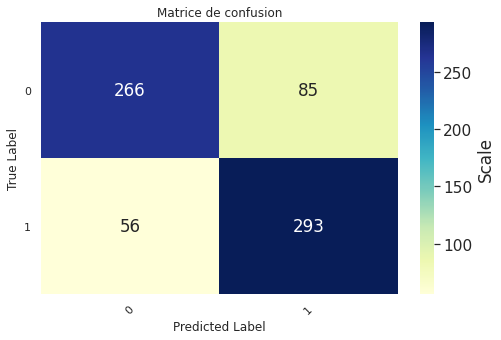

In [ ]:
# il suffit de prendre un echantillon sur df_donnees et de faire la prediction sur ces donnees 
# avec nouveaumodel (nouveaumodel.predict (samples)). 
# En fait le nouveau modele obtient une accuracy d'a peu pres 0.81 ce qui est assez similaire 
# a celui que nous avions obtenu pour lorsque nous avions appris sur le jeu de donnees precedent. 
# Ici le fait d'avoir plus de documents pour apprendre permet aussi de pouvoir obtenir un meilleur modele. 

# selection d'un echantillon 
nb_samples=700
print ("Selection aleatoire de ",nb_samples," documents ")

samples=[]
samples_result=[]
sample_new=[]
for i in range(0,nb_samples):
    val=randint(1,df_donnees.shape[0]-1)
    sample_new.append(val)
    samples.append(df_donnees.sentence[val])
    samples_result.append(df_donnees.sentiment[val])
    
print ("Prediction sur ",nb_samples," donnees tirees au hasard ") 

y_test=samples_result 

y_pred = nouveaumodel.predict(samples)

# autres mesures et matrice de confusion
MyshowAllScores(y_test,y_pred)

Comme nous pouvons le constater le nouveau modèle s'applique bien sur le jeu de données précédents... il reste cependant encore beaucoup de travail à faire pour avoir un modèle  efficace qui soit capable de déterminer les opinions dans tous les textes et cela est un véritable travail de recherche ... **Bienvenue à EGC qui propose chaque année de nouvelles propositions pour améliorer les résultats**.   

Allez maintenant il est temps de mettre tout cela en pratique et pour cela ....rendez vous sur le notebook "**5 - Un petit challenge**"